# What you will learn 
* What is a deployment and why do we deploy machine learning models.
* Develop a machine learning pipeline and train models using PyCaret.
* Build a simple web app using a Python framework called ‘Flask’.
* Deploy a web app on ‘Heroku’ and see your model in action.

# What tools we will use in this tutorial

### PyCaret

PyCaret is an open source, low-code machine learning library in Python to train and deploy machine learning pipelines and models in production.

### Flask
Flask is a framework that allows you to build web applications.eg website, a blog, e-commerce system etc

### GitHub
GitHub is a cloud-based service that is used to host, manage and control code.

### Heroku
This will allow you to take the application from your local machine to the cloud so that anybody can access it using a Web URL



# Business Problem

An insurance company wants to improve its cash flow forecasting by better predicting patient charges using demographic and basic patient health risk metrics at the time of hospitalization.

# Objective

To build a web application where demographic and health information of a patient is entered in a web form to predict charges.

# Tasks

* Train and validate models and develop a machine learning pipeline for deployment.
* Build a basic HTML front-end with an input form for independent variables (age, sex, bmi, children, smoker, region).
* Build a back-end of the web application using a Flask Framework.
* Deploy the web app on Heroku. Once deployed, it will become publicly available and can be accessed via Web URL.

In [1]:

from pycaret.regression import *


from pandas_profiling import ProfileReport



In [2]:

from pycaret.datasets import get_data
data = get_data('insurance')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

In [3]:
data.shape 

(1338, 7)

In [4]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
print(s2)

(      bmi_Power2  age_Power2  sex_female  sex_male  children_0  children_1  \
0      -0.513241   -1.220462         1.0       0.0         1.0         0.0   
1       0.420429   -1.253341         0.0       1.0         0.0         1.0   
2       0.287826   -0.844579         0.0       1.0         0.0         0.0   
3      -1.191289   -0.573551         0.0       1.0         1.0         0.0   
4      -0.369724   -0.631311         0.0       1.0         1.0         0.0   
...          ...         ...         ...       ...         ...         ...   
1333   -0.047104    0.680283         0.0       1.0         0.0         0.0   
1334    0.106991   -1.253341         1.0       0.0         1.0         0.0   
1335    0.981425   -1.253341         1.0       0.0         1.0         0.0   
1336   -0.804095   -1.149373         1.0       0.0         1.0         0.0   
1337   -0.341326    1.765281         1.0       0.0         1.0         0.0   

      children_2  children_3  children_4  children_5  ...  \
0

In [6]:
s2[0].columns

Index(['bmi_Power2', 'age_Power2', 'sex_female', 'sex_male', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4', 'children_5',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'age_0.0', 'age_1.0',
       'age_10.0', 'age_11.0', 'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0',
       'age_6.0', 'age_7.0', 'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0',
       'bmi_10.0', 'bmi_11.0', 'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0',
       'bmi_6.0', 'bmi_7.0', 'bmi_8.0', 'bmi_9.0',
       'smoker_no_multiply_bmi_Power2', 'smoker_yes_multiply_bmi_Power2',
       'children_0_multiply_bmi_Power2', 'sex_female_multiply_bmi_Power2',
       'sex_male_multiply_age_Power2', 'sex_male_multiply_smoker_yes',
       'age_Power2_multiply_bmi_Power2', 'smoker_yes_multiply_children_3',
       'smoker_no_multiply_age_Power2', 'smoker_yes_multiply_children_0',
       'region_southeast_multiply_smoker_yes',
       'region_

In [7]:
# return best model
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,2744.2417,23999623.0376,4882.5035,0.8306,0.4486,0.3170,0.1306
1,Gradient Boosting Regressor,2821.9987,24823596.6911,4961.5740,0.8253,0.4717,0.3393,0.2366
2,Bayesian Ridge,3077.0685,25174326.2255,5000.6542,0.8222,0.4403,0.3286,0.0104
3,Ridge Regression,3090.6922,25268170.1531,5009.9622,0.8215,0.4443,0.3293,0.0101
4,Lasso Regression,3111.2633,25530007.8847,5036.7196,0.8194,0.4483,0.3332,0.0630
5,Linear Regression,3116.5832,25576869.9794,5040.5193,0.8191,0.4510,0.3343,0.0266
6,Orthogonal Matching Pursuit,3109.6304,26122572.5209,5094.5256,0.8166,0.4329,0.3309,0.0043
7,CatBoost Regressor,2901.0385,25971147.5808,5073.4728,0.8159,0.4792,0.3487,3.3119
8,Lasso Least Angle Regression,3186.1431,26352229.7855,5117.6637,0.8155,0.4620,0.3785,0.0170
9,TheilSen Regressor,3029.4918,26587802.5422,5130.7862,0.8141,0.4343,0.2952,3.5383


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [9]:
et = create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2514.6646,24357647.4854,4935.3467,0.8545,0.4617,0.2835
1,2654.4701,30555523.6652,5527.7051,0.8223,0.4363,0.2289
2,2675.3686,27157538.8463,5211.2896,0.6562,0.5495,0.3589
3,3233.0470,36923808.3654,6076.4964,0.6917,0.6372,0.6520
4,3852.9989,44741522.5859,6688.9104,0.6672,0.6218,0.4795
5,2958.2536,28082388.9973,5299.2819,0.8194,0.4256,0.3017
6,2498.1677,24215466.4567,4920.9213,0.8352,0.4421,0.3202
7,2761.1126,30794431.9187,5549.2731,0.8307,0.4496,0.2173
8,2175.3868,20346673.0424,4510.7287,0.8686,0.3876,0.2733
9,3186.4061,35870782.4671,5989.2222,0.7690,0.5153,0.3492


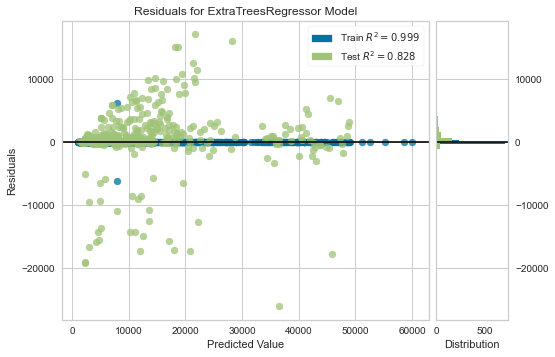

In [10]:
plot_model(et)

In [11]:
save_model(et, 'deployment1_13092020')

Transformation Pipeline and Model Succesfully Saved


In [12]:
deployment_28042020 = load_model('deployment1_13092020')

Transformation Pipeline and Model Successfully Loaded


In [13]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_d

In [14]:
#@app.route('/predict_api',methods=['POST'])
def predict_api():
    data = request.get_json(force=True)
    data_unseen = pd.DataFrame([data])
    prediction = predict_model(model, data=data_unseen)
    output = prediction.Label[0]
    return jsonify(output)

In [15]:
#api
How to  use the api  using  request 

patient={

    "age":20,
    "sex":"male",
    "bmi":25,
    "children":0,
    "smoker":"yes",
    "region":"southwest"
}


import requests
r = requests.post("http://127.0.0.1:5000/predict_api",json=patient)

if r.status_code == 200:
    print(f"Success: {r.text}")
else:
    print(f"Failure: {r.text}")

Success: 16425.6885

